In [1]:
import pandas as pd
import sqlalchemy
import geopandas as gpd
import matplotlib.font_manager
import matplotlib.pyplot as plt
import time 

In [2]:
import sys
sys.path.append(r"C:\Users\dubois\acv-express-test")
sys.path.append(r"C:\Users\dubois\typy")
sys.path.append(r"C:\Users\dubois\gorenove-to-SED\enricher")
sys.path.append(r"C:\Users\dubois\gorenove-to-SED\interfacer")
sys.path.append(r"C:\Users\dubois\rslab")
sys.path.append(r"C:\Users\dubois\bdnb-dataviz")

In [3]:
from pkg_resources import resource_filename
from enrichtopia.bdnb_connection.connection_function import bdnb_connection
db_config_file_path = resource_filename('acv_express', 'config.yml')

In [4]:
schema_source="bdnb_sources_v07"
schema_gen='bdnb_v07'

schema_dpe_sim='simulations'
version_sim="energy_prediction_v073_4"

table_ffo_gr='batiment_groupe_ffo_bat'
table_rnc_gr='batiment_groupe_rnc'

#bat_group
bat_group=['bat_gr.'+i for i in ['batiment_groupe_id']]
bat_gr_ffo=['bat_ffo.'+i for i in ["usage_niveau_1_txt",'nb_log','nb_log_soc as nb_log_soc_ff','nb_log_loue','nb_log_hlm','nb_log_vac','nb_log_occ_prop',
                                  's_log','s_log_soc as s_log_soc_ff','s_loc_mi','s_loc_appt',]]
bat_rnc=['bat_rnc.'+i for i in ['l_nom_copro as rnc_copro']]

In [5]:
import matplotlib.font_manager
# dans un notebook 
matplotlib.font_manager.fontManager.addfont(r'C:\Users\dubois\.fonts\Montserrat\Montserrat-Italic-VariableFont_wght.ttf')
matplotlib.font_manager.fontManager.addfont(r'C:\Users\dubois\.fonts\Montserrat\Montserrat-VariableFont_wght.ttf')

In [6]:
import bdnb_dataviz
from bdnb_dataviz.color_palettes import dpe_ademe, dpe_bdnb, mat_mur_simple 
from bdnb_dataviz.utils.mpl_utils import annotate_stacked_bar
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np 
import pandas as pd
%matplotlib inline

Newly available styles : ['bdnb-base', 'bdnb-blog', 'bdnb-dark', 'bdnb-empty', 'bdnb-facebook', 'bdnb-linkedin', 'bdnb-poster', 'bdnb-ppt', 'bdnb-rapport', 'bdnb-twitter']


In [18]:
# FILIALE AL

filiales = ["IN'LI IDF - BDNB",
            "CLESENCE - BDNB",
            "PLURIAL NOVILIA - BDNB",
          ]

level = "filiale_Action_Logement"
df_inli = pd.read_parquet('stat_log_dpe_inli_exploitation.pqt')
df_clesence = pd.read_parquet('stat_log_dpe_clesence_exploitation.pqt')
df_plurial = pd.read_parquet('stat_log_dpe_plurial_exploitation.pqt')

titre = "FILIALE ACTION LOGEMENT"

df = pd.concat([df_inli, df_clesence, df_plurial], ignore_index=True)
df = df.loc[(df['usage_niveau_1'] == 'Résidentiel collectif') | (df['usage_niveau_1'] == 'Résidentiel individuel')]
df = df[df['annee_construction'].notna()]

In [19]:
df = df.groupby(['annee_construction']).sum()
df.head(2)

,id_cstb,code_departement_insee,nb_log,s_log,type_energie_chauffage,source_information_principale,gisement_ges_log,nb_log_a,nb_log_b,nb_log_c,...,etat_initial_conso_total_charbon_estim_mean,etat_initial_conso_total_gpl_estim_mean,etat_renove_conso_total_bois_estim_mean,etat_renove_conso_total_electricite_estim_mean,etat_renove_conso_total_fioul_estim_mean,etat_renove_conso_total_gaz_estim_mean,etat_renove_conso_total_reseau_de_chaleur_estim_mean,etat_renove_conso_total_charbon_estim_mean,etat_renove_conso_total_gpl_estim_mean,index
annee_construction,,,,,,,,,,,,,,,,,,,,,
1500.0,1065.0,51,3,272,0.0,0.0,8160.0,0.0,0.0,0.060000,...,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1138.0
1700.0,5080.0,55,8,620,0.0,0.0,9992.0,0.0,0.0,4.340707,...,0.0,4.0,0.0,79.0,0.0,147.0,0.0,0.0,0.0,7592.0


In [20]:
df = df[1900:2020]

In [21]:
df = df[["nb_log", "s_log", "nb_log_a", "nb_log_b", "nb_log_c", "nb_log_d", "nb_log_e", "nb_log_f", "nb_log_g"]]

In [22]:
df.head(4)

,nb_log,s_log,nb_log_a,nb_log_b,nb_log_c,nb_log_d,nb_log_e,nb_log_f,nb_log_g
annee_construction,,,,,,,,,
1900.0,566,37077,0.0,0.18,14.850606,355.903893,109.815371,63.333633,21.916503
1902.0,1,118,0.0,0.00,0.030000,0.340000,0.320000,0.190000,0.120000
1903.0,3,350,0.0,0.01,0.220000,1.190000,0.810000,0.500000,0.270000
1904.0,10,473,0.0,0.00,0.000000,0.000000,6.200000,3.800000,0.000000


<AxesSubplot: ylabel='annee_construction'>

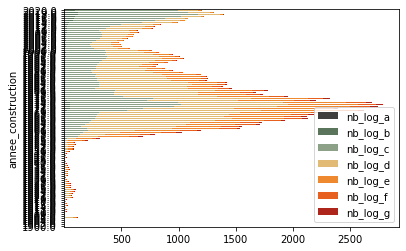

In [23]:
df[["nb_log_a", "nb_log_b", "nb_log_c", 
    "nb_log_d", "nb_log_e", "nb_log_f", "nb_log_g"]].rolling(5).mean().plot.barh(stacked=True, 
                                                                                 color=dpe_bdnb.values())

In [14]:
df["nb_log"].to_list()

[566,
 1,
 3,
 10,
 23,
 10,
 11,
 55,
 25,
 1,
 61,
 1,
 1,
 48,
 283,
 17,
 44,
 95,
 74,
 81,
 17,
 15,
 20,
 1,
 49,
 72,
 52,
 25,
 60,
 1,
 22,
 1,
 1,
 10,
 76,
 3,
 31,
 135,
 201,
 66,
 2,
 115,
 81,
 786,
 590,
 1858,
 671,
 1227,
 1998,
 2336,
 1924,
 1624,
 1334,
 2653,
 3299,
 1883,
 1812,
 2336,
 3899,
 2171,
 4140,
 1969,
 1791,
 1434,
 2787,
 1790,
 910,
 1473,
 1960,
 1234,
 1435,
 1120,
 1461,
 1075,
 1345,
 1367,
 820,
 665,
 613,
 947,
 998,
 882,
 1146,
 981,
 1278,
 793,
 577,
 560,
 654,
 304,
 454,
 518,
 471,
 859,
 474,
 703,
 575,
 652,
 817,
 1127,
 790,
 855,
 1413,
 1139,
 1261,
 1533,
 1687,
 1226,
 702]

In [15]:
alphas = np.linspace(0.1, 1, 10)


In [16]:
range(1900, 2020, 2)

range(1900, 2020, 2)

# Nombre de logements et répartition DPE

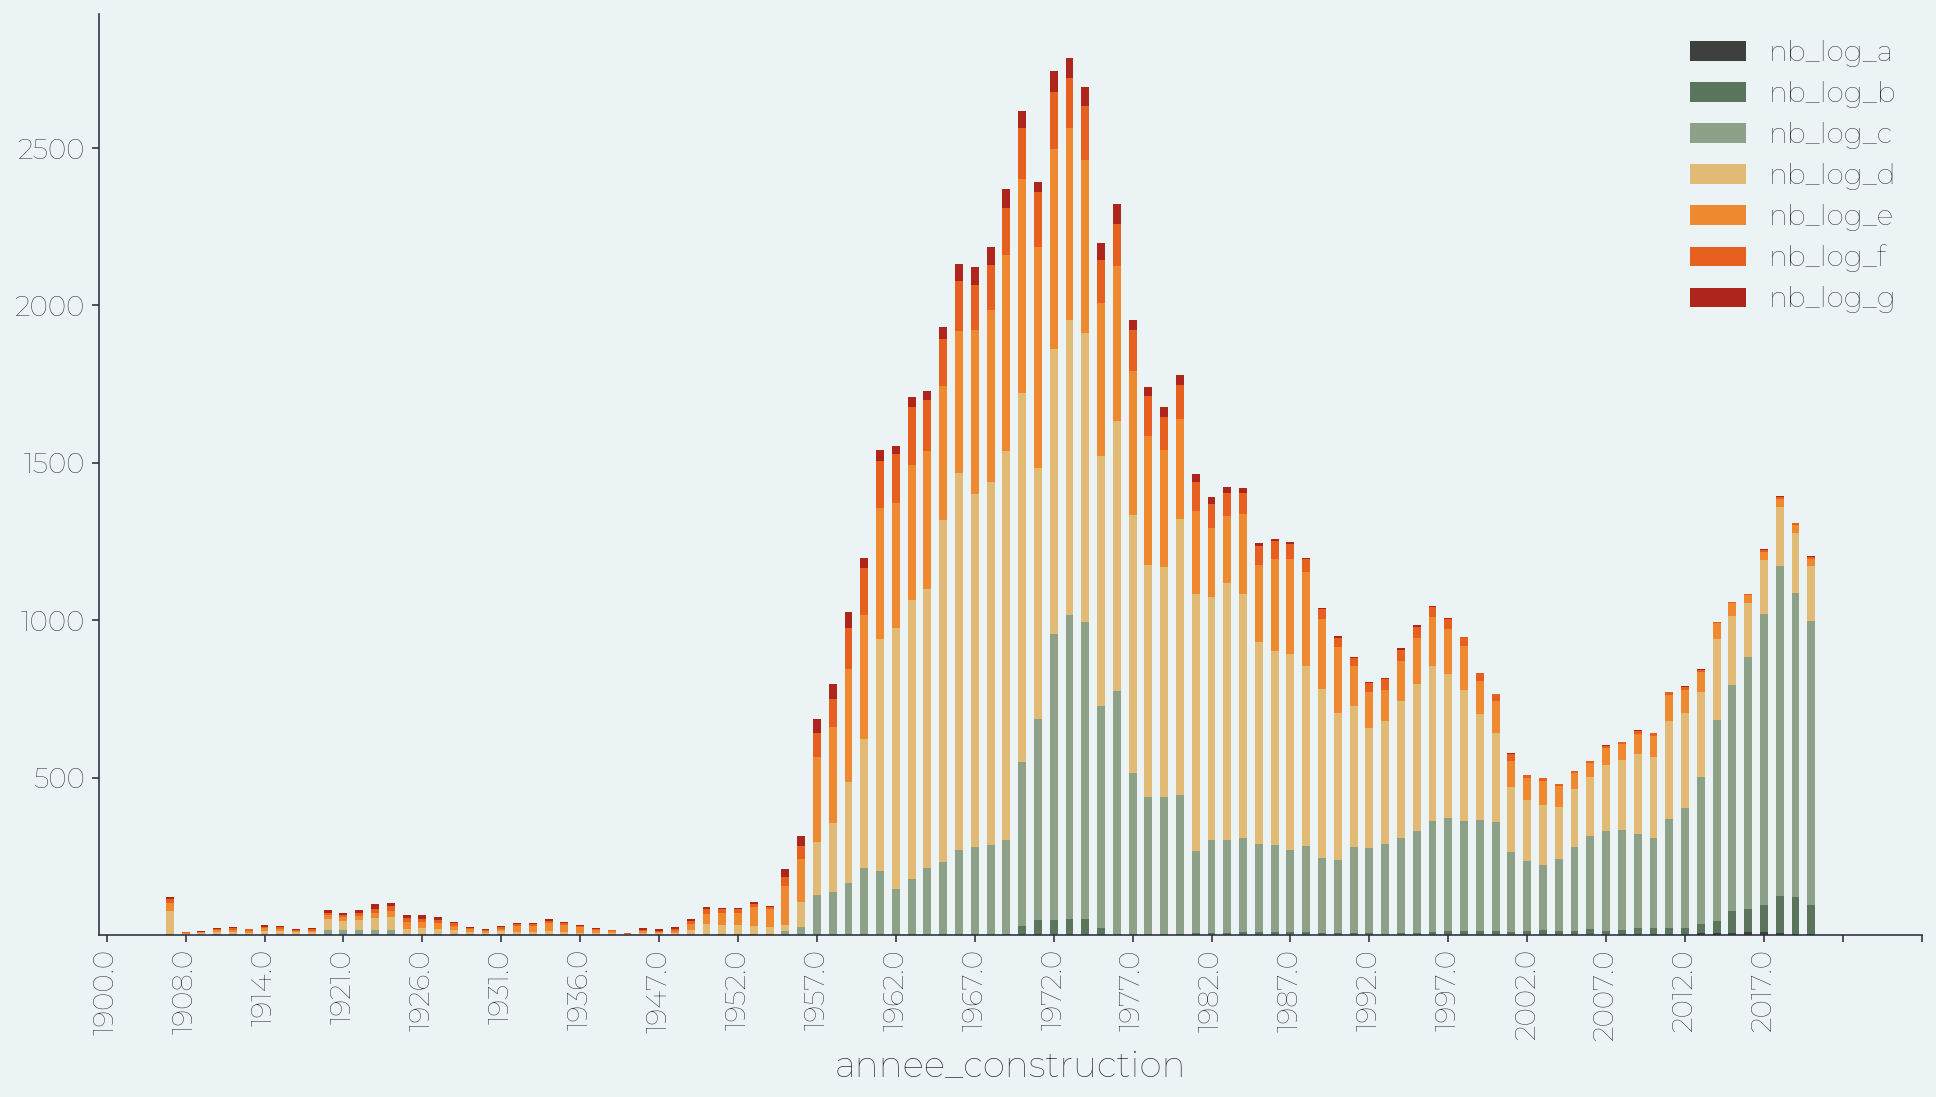

In [25]:
with plt.style.context(['bdnb-base', 'bdnb-ppt']) :

    
    f  = plt.figure(constrained_layout=True,)
    axd = f.subplot_mosaic( [
                            ['test'],
                            ],                        
                            height_ratios=[1], # set the height ratios between the rows                        
                            width_ratios=[ 1])# set the width ratios between the columns
    
    

    df[["nb_log_a", "nb_log_b", "nb_log_c", 
    "nb_log_d", "nb_log_e", "nb_log_f", "nb_log_g"]].rolling(5).mean().plot.bar(stacked=True, 
                                                                                 color=dpe_bdnb.values(),
                                                                                 #alpha=alphas,
                                                                                ax=axd["test"])
    #axd['test'].set_ylim([0,100])
    axd['test'].set_xticks(range(0, 120, 5))

    #axd['test'].set_ylim([1900,2020])
    
    f.savefig(f'./graphs/Nombre_de_logement_et_DPE.png',bbox_inches='tight',dpi=300)  

# DPE par année (j'aimerais bien changer l'intensité alpha en fonction du nombre de logements)

In [26]:
#df["nb_log_a"] = df["nb_log_a"] / (df["nb_log_a"] + df["nb_log_b"] + df["nb_log_c"] + df["nb_log_d"] + df["nb_log_e"] + df["nb_log_f"] + df["nb_log_g"]) * 100

df["nb_log_a"] = df["nb_log_a"] / df["nb_log"] * 100
df["nb_log_b"] = df["nb_log_b"] / df["nb_log"] * 100
df["nb_log_c"] = df["nb_log_c"] / df["nb_log"] * 100
df["nb_log_d"] = df["nb_log_d"] / df["nb_log"] * 100
df["nb_log_e"] = df["nb_log_e"] / df["nb_log"] * 100
df["nb_log_f"] = df["nb_log_f"] / df["nb_log"] * 100
df["nb_log_g"] = df["nb_log_g"] / df["nb_log"] * 100


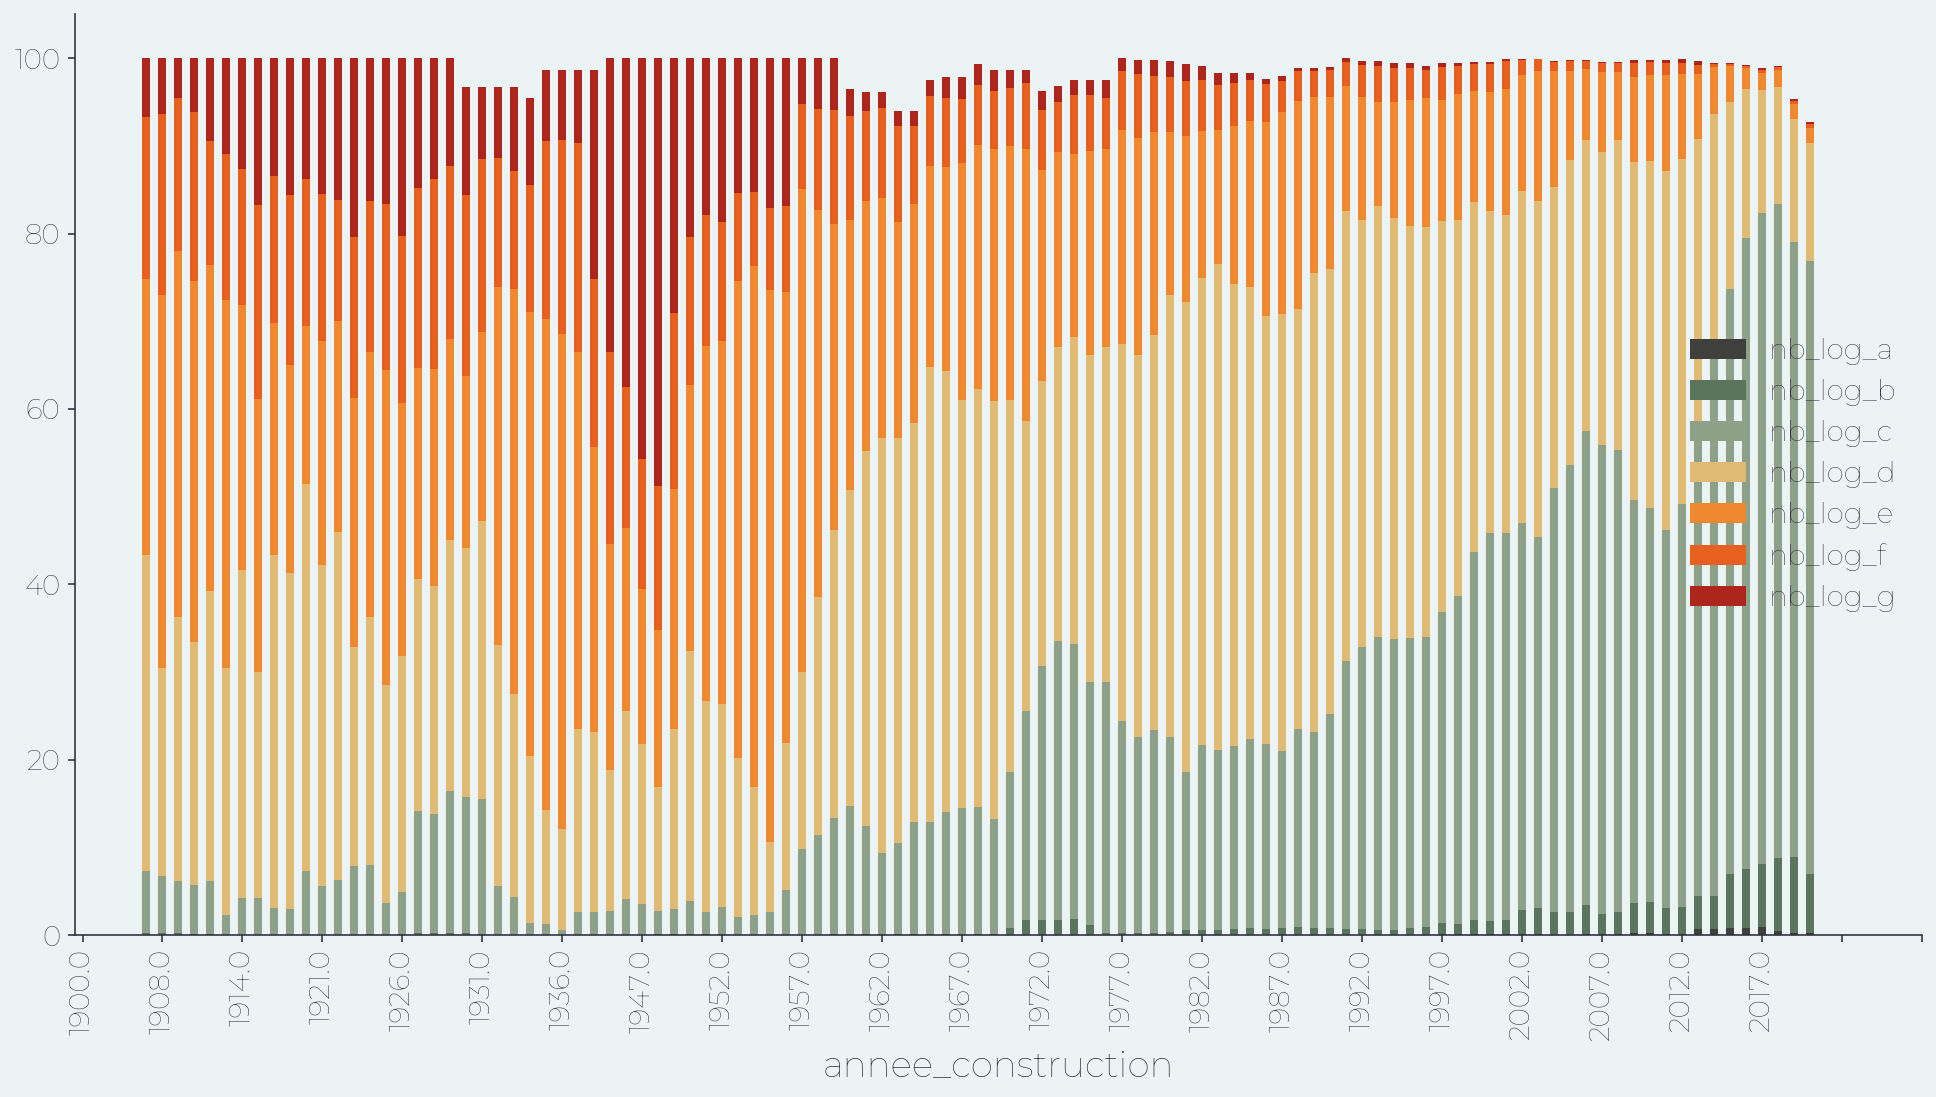

In [27]:
with plt.style.context(['bdnb-base', 'bdnb-ppt']) :

    
    f  = plt.figure(constrained_layout=True,)
    axd = f.subplot_mosaic( [
                            ['test'],
                            ],                        
                            height_ratios=[1], # set the height ratios between the rows                        
                            width_ratios=[ 1])# set the width ratios between the columns
    
    

    df[["nb_log_a", "nb_log_b", "nb_log_c", 
    "nb_log_d", "nb_log_e", "nb_log_f", "nb_log_g"]].rolling(5).mean().plot.bar(stacked=True, 
                                                                                 color=dpe_bdnb.values(),
                                                                                 #alpha=alphas,
                                                                                ax=axd["test"])
    #axd['test'].set_ylim([0,100])
    axd['test'].set_xticks(range(0, 120, 5))

    #axd['test'].set_ylim([1900,2020])
    
    f.savefig(f'./graphs/DPE_par_année.png',bbox_inches='tight',dpi=300)  

# Conso par années? Comme les graphs du GIEC de la température par année

In [250]:
# FILIALE AL

filiales = ["IN'LI IDF - BDNB",
            "CLESENCE - BDNB",
            "PLURIAL NOVILIA - BDNB",
          ]

level = "filiale_Action_Logement"
df_inli = pd.read_parquet('stat_log_dpe_inli_exploitation.pqt')
df_clesence = pd.read_parquet('stat_log_dpe_clesence_exploitation.pqt')
df_plurial = pd.read_parquet('stat_log_dpe_plurial_exploitation.pqt')

titre = "FILIALE ACTION LOGEMENT"

df = pd.concat([df_inli, df_clesence, df_plurial], ignore_index=True)
df = df.loc[(df['usage_niveau_1'] == 'Résidentiel collectif') | (df['usage_niveau_1'] == 'Résidentiel individuel')]
df = df[df['annee_construction'].notna()]

In [270]:
# FRANCE
df = pd.read_parquet("save_requete_pour_pareto_france.pqt")
df.shape

(19139618, 5)

In [251]:
df.head(2)

,batiment_groupe_id,id_cstb,geom_groupe,result_label,code_departement_insee,nb_log,s_log,type_energie_chauffage,source_information_principale,gisement_ges_log,...,etat_renove_conso_total_electricite_estim_mean,etat_renove_conso_total_fioul_estim_mean,etat_renove_conso_total_gaz_estim_mean,etat_renove_conso_total_reseau_de_chaleur_estim_mean,etat_renove_conso_total_charbon_estim_mean,etat_renove_conso_total_gpl_estim_mean,usage_niveau_1,annee_construction,index,id_cstb_adr
0,60057000CA0061_3ab4958d444a777,845.0,"MULTIPOLYGON (((632495.9 6924553.5, 632568.2 6...",2 Rue de la Briqueterie 60000 Beauvais,60,20,1600,NaN,NaN,14400.0,...,23.0,0.0,60.0,0.0,0.0,0.0,Résidentiel collectif,1960.0,NaN,NaN
1,60159000BD0290_0ce7d414d424a5a,277.0,"MULTIPOLYGON (((687822.9 6923128.8, 687824.5 6...",81 Rue Carnot 60200 Compiègne,60,1,67,NaN,NaN,67.0,...,28.0,0.0,28.0,0.0,0.0,0.0,Résidentiel collectif,1982.0,NaN,NaN


In [252]:
df = df[df['annee_construction'].notna()]
df = df.loc[df['annee_construction'] >= 1901]

In [253]:
df["annee_construction"].value_counts()

1981.0    194
1984.0    150
1983.0    135
1963.0    132
1986.0    119
         ... 
1913.0      1
1915.0      1
1940.0      1
1935.0      1
1908.0      1
Name: annee_construction, Length: 108, dtype: int64

In [254]:
df = df.groupby(['annee_construction']).sum()

In [255]:
df.head(5)

,id_cstb,code_departement_insee,nb_log,s_log,type_energie_chauffage,source_information_principale,gisement_ges_log,nb_log_a,nb_log_b,nb_log_c,...,etat_initial_conso_total_charbon_estim_mean,etat_initial_conso_total_gpl_estim_mean,etat_renove_conso_total_bois_estim_mean,etat_renove_conso_total_electricite_estim_mean,etat_renove_conso_total_fioul_estim_mean,etat_renove_conso_total_gaz_estim_mean,etat_renove_conso_total_reseau_de_chaleur_estim_mean,etat_renove_conso_total_charbon_estim_mean,etat_renove_conso_total_gpl_estim_mean,index
annee_construction,,,,,,,,,,,,,,,,,,,,,
1902.0,2263.0,51,1,118,0.0,0.0,3068.0,0.0,0.00,0.03,...,0.0,0.0,0.0,29.0,0.0,64.0,0.0,0.0,0.0,598.0
1903.0,0.0,63,3,350,0.0,0.0,9788.0,0.0,0.01,0.22,...,0.0,0.0,0.0,139.0,0.0,0.0,0.0,0.0,0.0,7057.0
1904.0,232.0,93,10,473,0.0,0.0,25069.0,0.0,0.00,0.00,...,0.0,12.0,0.0,20.0,0.0,49.0,0.0,0.0,0.0,0.0
1905.0,6548.0,104,23,1463,0.0,0.0,22681.0,0.0,0.18,5.11,...,0.0,2.0,0.0,107.0,0.0,95.0,0.0,0.0,0.0,3154.0
1908.0,6206.0,51,10,634,0.0,0.0,4438.0,0.0,0.00,0.00,...,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,3694.0


In [256]:
df = df[1900:2020]

In [257]:
df = df[["gisement_ges_log", "etat_initial_consommation_energie_estim_mean"]]

In [258]:
#tot = df["etat_initial_ges_estim_mean"].sum()
#df["etat_initial_ges_estim_mean"] = (df["etat_initial_ges_estim_mean"] / tot * 100)

In [259]:
df -= df.min()

In [260]:
df /= df.max()

In [262]:
df["gisement_ges_log"].min()

0.0

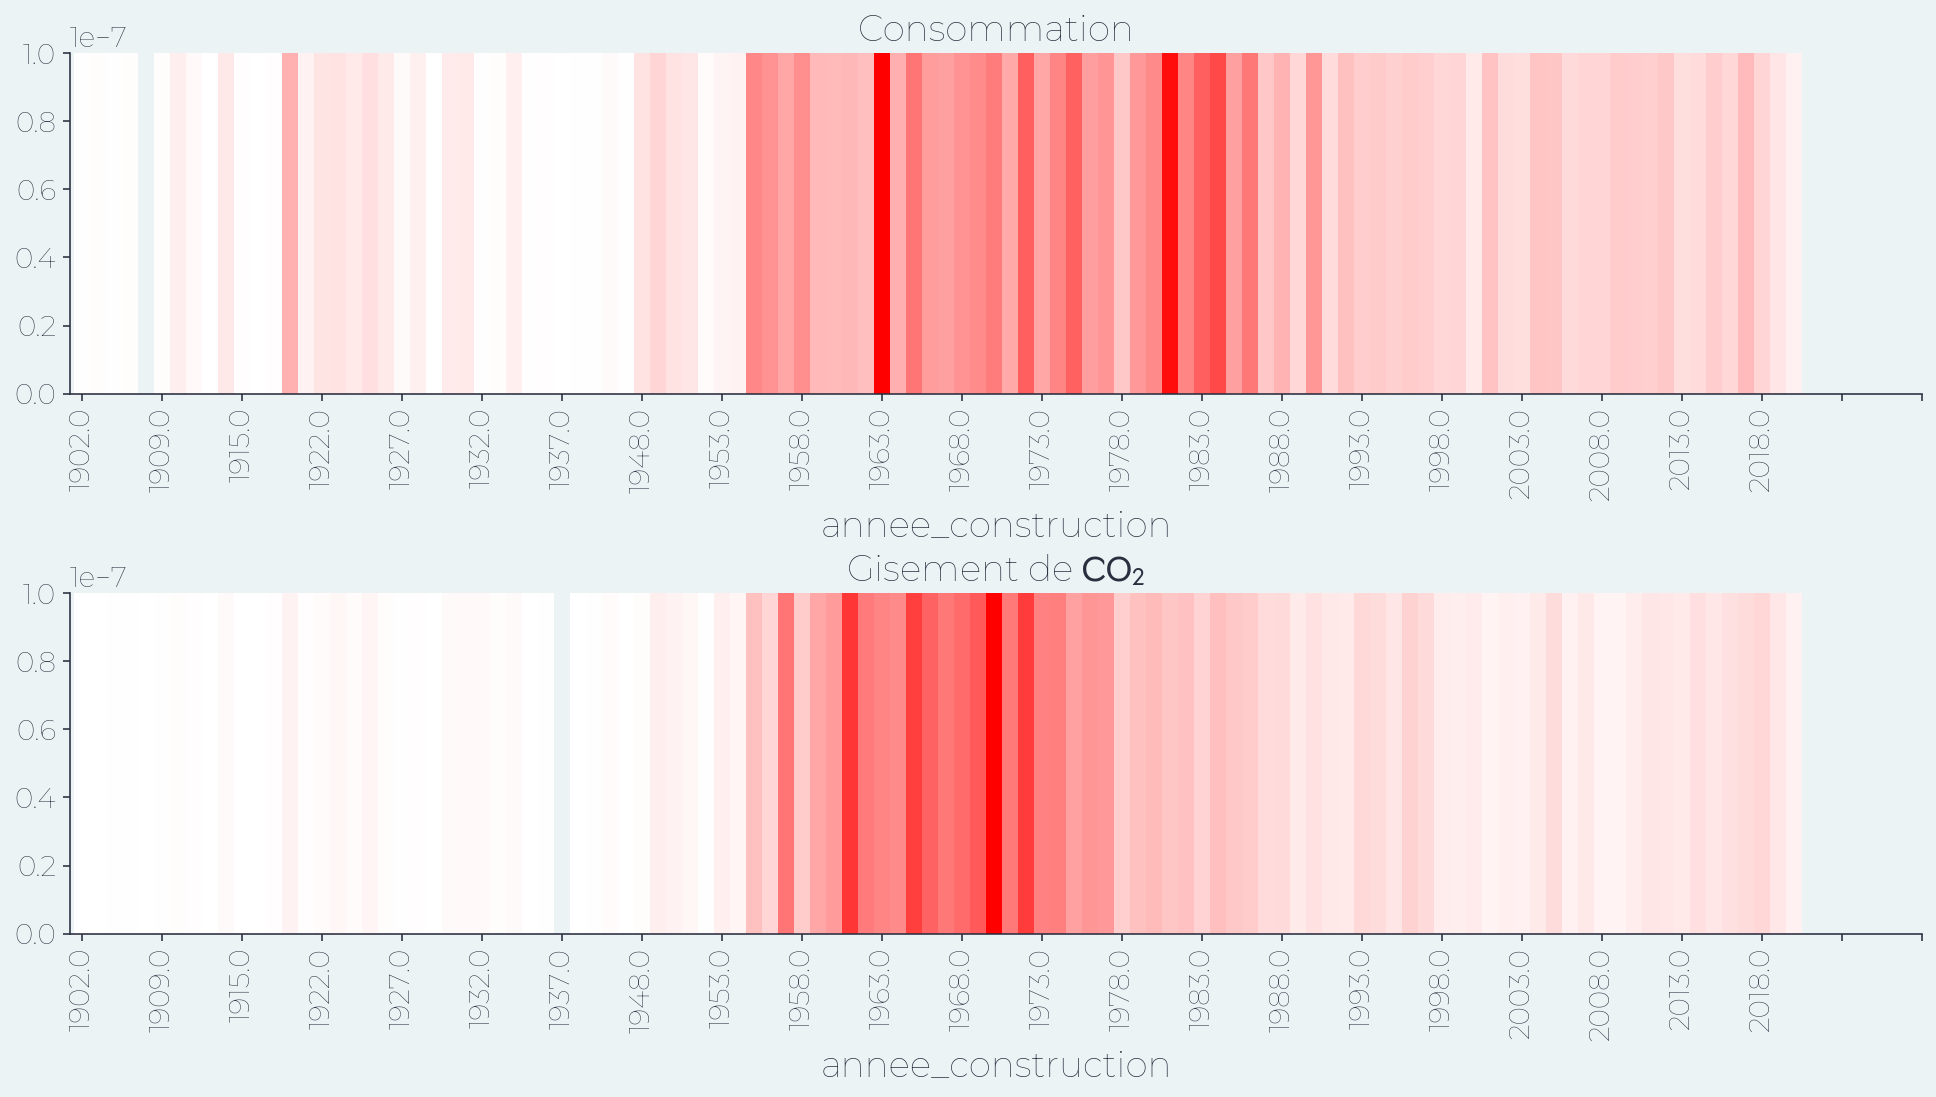

In [265]:
with plt.style.context(['bdnb-base', 'bdnb-ppt']) :

    
    f  = plt.figure(constrained_layout=True,)
    axd = f.subplot_mosaic( [
                            ['conso'],
                            ['gisement'],
                            ],                        
                            height_ratios=[1, 1], # set the height ratios between the rows                        
                            width_ratios=[1])# set the width ratios between the columns
    
    

    df["etat_initial_consommation_energie_estim_mean"].plot.bar(stacked=True,
                                               color=[(1, 1-x, 1-x) for x in df["etat_initial_consommation_energie_estim_mean"]],
                                               width=1,
                                               #alpha=alphas,
                                               ax=axd["conso"])

    df["gisement_ges_log"].plot.bar(stacked=True,
                                               color=[(1, 1-x, 1-x) for x in df["gisement_ges_log"]],
                                               width=1,
                                               #alpha=alphas,
                                               ax=axd["gisement"])   

    axd['conso'].set_ylim([0,0.0000001])
    axd['conso'].set_xlim()
    axd['conso'].set_xticks(range(0, 120, 5))
    axd['conso'].set_title('Consommation')

    
    axd['gisement'].set_ylim([0,0.0000001])
    axd['gisement'].set_xlim()
    axd['gisement'].set_xticks(range(0, 120, 5))
    axd['gisement'].set_title('Gisement de $\mathrm{CO_2}$')

    #axd['test'].set_alpha(0.5)

    
    f.savefig(f'./graphs/Conso_initial_par_annee.png',bbox_inches='tight',dpi=300)  